# Imports

In [1]:
import pandas as pd
import numpy as np
import math

# models
from catboost import Pool, CatBoostClassifier
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.pipeline import make_pipeline

# processing
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.decomposition import PCA

# plot
import matplotlib.pyplot as plt
import seaborn as sns

# config
pd.set_option('display.max_columns', 50)
path = 'datasets/kaggle/Apartment-rental-offers-in-Germany/'

# Load Data

In [6]:
data = pd.read_csv(path+'immo_data.csv')
print(data.shape)
display(data.head())
display(data.info())
display(data.describe())

(268850, 49)


,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,840.0,1965.0,96107057,1.0,oil,False,Nordrhein_Westfalen,True,2.0,595.0,244,86.00,Dortmund,well_kept,normal,NaN,Sch&uuml;ruferstra&szlig;e,Schüruferstraße,False,4,ground_floor,44269,4.0,181.4,1.0,3.0,4,True,4,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,NaN,1871.0,111378734,2.0,gas,False,Rheinland_Pfalz,False,1.0,800.0,NaN,89.00,Rhein_Pfalz_Kreis,refurbished,normal,no,no_information,NaN,False,5,ground_floor,67459,3.0,NaN,NaN,NaN,3,False,4,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,1300.0,2019.0,113147523,1.0,NaN,False,Sachsen,True,9.0,965.0,4,83.80,Dresden,first_time_use,sophisticated,NaN,Turnerweg,Turnerweg,True,6,apartment,1097,3.0,NaN,3.0,4.0,3,False,4,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,NaN,1964.0,108890903,NaN,district_heating,False,Sachsen,False,2.0,343.0,35,58.15,Mittelsachsen_Kreis,NaN,NaN,NaN,Gl&uuml;ck-Auf-Stra&szlig;e,Glück-Auf-Straße,False,2,other,9599,3.0,86.0,3.0,NaN,3,False,2,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,903.0,1950.0,114751222,NaN,gas,False,Bremen,False,1.0,765.0,10,84.97,Bremen,refurbished,NaN,NaN,Hermann-Henrich-Meier-Allee,Hermann-Henrich-Meier-Allee,False,5,apartment,28213,3.0,188.9,1.0,NaN,3,False,4,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

None

,serviceCharge,telekomHybridUploadSpeed,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,yearConstructedRange,baseRent,livingSpace,baseRentRange,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,livingSpaceRange,heatingCosts,lastRefurbish,electricityBasePrice,electricityKwhPrice
count,261941.000000,45020.0,268850.000000,267018.000000,235492.000000,2.283330e+05,211805.000000,2.688500e+05,93052.000000,211805.000000,2.688500e+05,268850.000000,268850.000000,268850.000000,268850.000000,162344.000000,217541.000000,171118.000000,268850.000000,268850.000000,85518.000000,80711.000000,46846.000000,46846.000000
mean,151.206113,10.0,9.791958,3.389001,28.804928,9.013315e+02,1966.400590,1.069697e+08,1.327634,3.714544,6.941294e+02,74.355548,3.765256,37283.022235,2.641261,114.749533,2.122405,3.572319,2.571542,3.070790,76.990866,2013.904536,89.113612,0.199769
std,308.295790,0.0,6.408399,1.964874,16.337151,3.323833e+04,46.992207,1.250093e+07,8.361403,2.738134,1.953602e+04,254.759208,2.214357,27798.037296,2.633440,61.653663,3.634934,6.375496,0.937594,1.407127,147.716278,10.963125,5.395805,0.009667
min,0.000000,10.0,0.000000,-12.330000,1.000000,0.000000e+00,1000.000000,2.887174e+07,0.000000,1.000000,0.000000e+00,0.000000,1.000000,852.000000,1.000000,0.100000,-1.000000,0.000000,1.000000,1.000000,0.000000,1015.000000,71.430000,0.170500
25%,95.000000,10.0,6.000000,2.000000,10.000000,4.698000e+02,1950.000000,1.066910e+08,1.000000,1.000000,3.380000e+02,54.000000,2.000000,9128.000000,2.000000,79.000000,1.000000,2.000000,2.000000,2.000000,54.000000,2012.000000,90.760000,0.191500
50%,135.000000,10.0,9.000000,3.390000,40.000000,6.500000e+02,1973.000000,1.111584e+08,1.000000,3.000000,4.900000e+02,67.320000,3.000000,38667.000000,3.000000,107.000000,2.000000,3.000000,3.000000,3.000000,70.000000,2017.000000,90.760000,0.198500
75%,190.000000,10.0,13.000000,4.570000,40.000000,9.850000e+02,1996.000000,1.137688e+08,1.000000,5.000000,7.990000e+02,87.000000,5.000000,57072.000000,3.000000,140.300000,3.000000,4.000000,3.000000,4.000000,90.000000,2019.000000,90.760000,0.205500
max,146118.000000,10.0,121.000000,14.920000,100.000000,1.575154e+07,2090.000000,1.157117e+08,2241.000000,9.000000,9.999999e+06,111111.000000,9.000000,99998.000000,999.990000,1996.000000,999.000000,999.000000,5.000000,7.000000,12613.000000,2919.000000,90.760000,0.227600


# Data Preprocessing

In [7]:
null_count = data.isnull().sum().sort_values(ascending = False)
null_count = null_count[null_count>0]
null_count

telekomHybridUploadSpeed    223830
electricityBasePrice        222004
electricityKwhPrice         222004
energyEfficiencyClass       191063
lastRefurbish               188139
heatingCosts                183332
noParkSpaces                175798
petsAllowed                 114573
interiorQual                112665
thermalChar                 106506
numberOfFloors               97732
houseNumber                  71018
streetPlain                  71013
condition                    68489
yearConstructedRange         57045
yearConstructed              57045
firingTypes                  56964
facilities                   52924
floor                        51309
heatingType                  44856
totalRent                    40517
typeOfFlat                   36614
telekomUploadSpeed           33358
telekomTvOffer               32619
description                  19747
serviceCharge                 6909
pricetrend                    1832
dtype: int64

### nulls

In [8]:
drop_features = null_count[null_count > data.shape[0] * 0.7]
print(drop_features)
data = data.drop(drop_features.index, axis=1)

telekomHybridUploadSpeed    223830
electricityBasePrice        222004
electricityKwhPrice         222004
energyEfficiencyClass       191063
dtype: int64


In [8]:
text_features = ['description', 'facilities', 'streetPlain']
data[text_features] = data[text_features].fillna(' ')

In [10]:
fill_with_zero_features = ['noParkSpaces']
data[fill_with_zero_features] = data[fill_with_zero_features].fillna(0)

In [11]:
fill_with_average_features = ['heatingCosts', 'thermalChar', 'yearConstructedRange', 'totalRent',
                              'telekomUploadSpeed', 'serviceCharge', 'pricetrend', 'yearConstructed']
data[fill_with_average_features] = data[fill_with_average_features].fillna(data[fill_with_average_features].mean())

In [12]:
fill_with_one_features = ['numberOfFloors', 'floor']
data[fill_with_one_features] = data[fill_with_one_features].fillna(1)

In [13]:
data.loc[data.lastRefurbish.isna(), 'lastRefurbish'] = data[data.lastRefurbish.isna()].yearConstructed

In [14]:
data = data.drop('houseNumber', axis=1)

In [15]:
fill_with_model = ['petsAllowed', 'interiorQual', 'condition', 'firingTypes', 'heatingType', 'typeOfFlat', 'telekomTvOffer']
train_features = [item for item in data.columns if item not in fill_with_model + ['livingSpace', 'street', 'scoutId', 'description', 'facilities', 'date', 'streetPlain']]

In [17]:
for feat in fill_with_model:
    print(feat)
    train = data[~data[feat].isna()]
    test = data[data[feat].isna()]

    train_data = train[train_features]
    eval_data = test[train_features]
    cat_features = ['regio1', 'newlyConst', 'balcony', 'hasKitchen', 'geo_bln', 'cellar', 'geo_krs', 'lift', 'garden','regio2', 'regio3']
    train_label = train[feat]
    train_dataset = Pool(data=train_data,
                         label=train_label,
                         cat_features=cat_features)
    eval_dataset = Pool(data=eval_data,
                        cat_features=cat_features)

    # Initialize CatBoostClassifier
    model = CatBoostClassifier(iterations=10,
                               learning_rate=1,
                               depth=2,
                               loss_function='MultiClass')
    # Fit model
    model.fit(train_dataset)
    predicted = model.predict(eval_dataset)
    data.loc[data[feat].isna(), feat] = predicted

petsAllowed
0:	learn: 0.7830814	total: 130ms	remaining: 1.17s
1:	learn: 0.7624724	total: 194ms	remaining: 776ms
2:	learn: 0.7462200	total: 258ms	remaining: 603ms
3:	learn: 0.7378226	total: 338ms	remaining: 507ms
4:	learn: 0.7281727	total: 415ms	remaining: 415ms
5:	learn: 0.7240437	total: 492ms	remaining: 328ms
6:	learn: 0.7178182	total: 558ms	remaining: 239ms
7:	learn: 0.7149832	total: 623ms	remaining: 156ms
8:	learn: 0.7110573	total: 682ms	remaining: 75.8ms
9:	learn: 0.7084732	total: 741ms	remaining: 0us
interiorQual
0:	learn: 0.7917386	total: 95ms	remaining: 855ms
1:	learn: 0.7244619	total: 188ms	remaining: 752ms
2:	learn: 0.6943131	total: 270ms	remaining: 631ms
3:	learn: 0.6799157	total: 352ms	remaining: 527ms
4:	learn: 0.6700533	total: 433ms	remaining: 433ms
5:	learn: 0.6688319	total: 523ms	remaining: 349ms
6:	learn: 0.6604992	total: 618ms	remaining: 265ms
7:	learn: 0.6549367	total: 707ms	remaining: 177ms
8:	learn: 0.6503082	total: 789ms	remaining: 87.6ms
9:	learn: 0.6471044	total:

In [12]:
null_count = data.isnull().sum().sort_values(ascending = False)
null_count = null_count[null_count>0]
print(null_count)


Series([], dtype: int64)


In [11]:
# data.to_csv(path+'null_filled.csv', index = None)
# data = pd.read_csv(path+'null_filled.csv')

### outliers

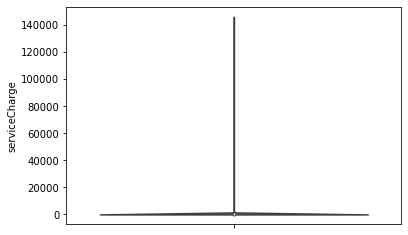

serviceCharge


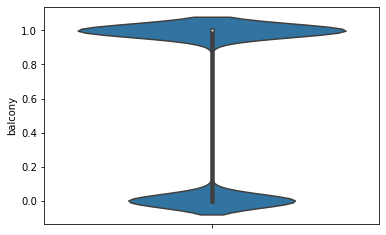

balcony


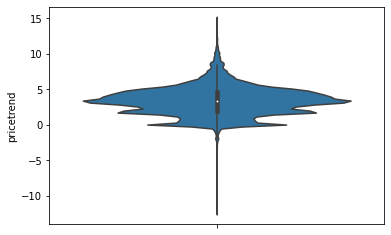

pricetrend


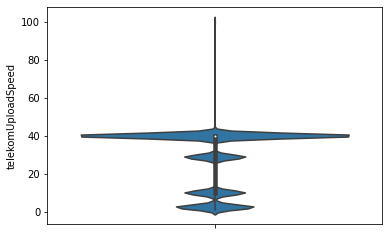

telekomUploadSpeed


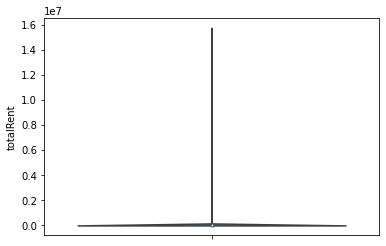

totalRent


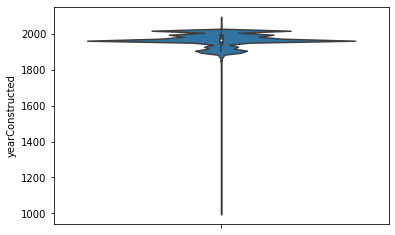

yearConstructed


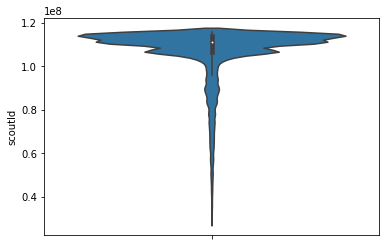

scoutId


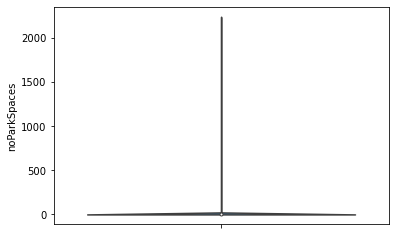

noParkSpaces


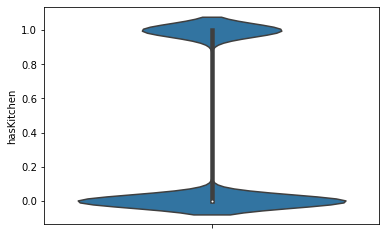

hasKitchen


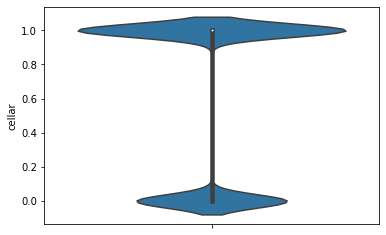

cellar


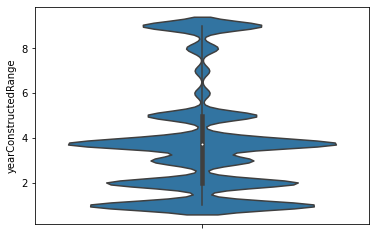

yearConstructedRange


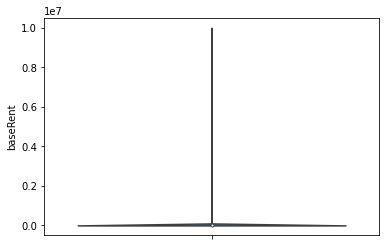

baseRent


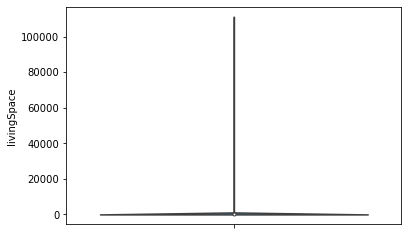

livingSpace


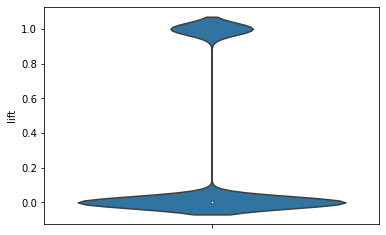

lift


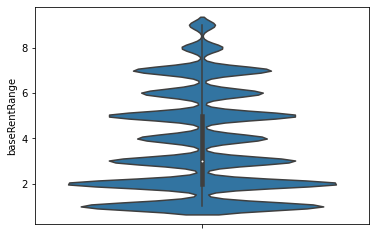

baseRentRange


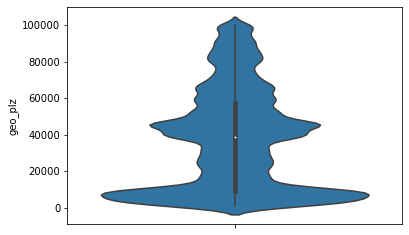

geo_plz


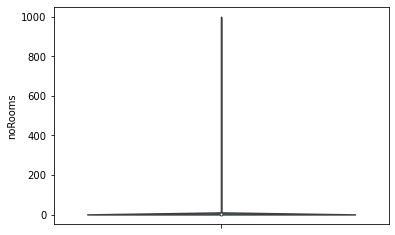

noRooms


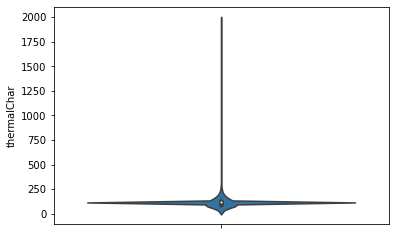

thermalChar


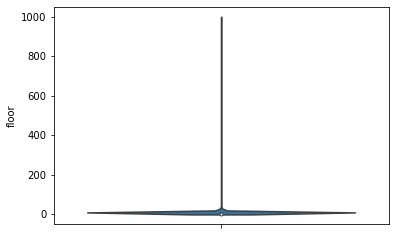

floor


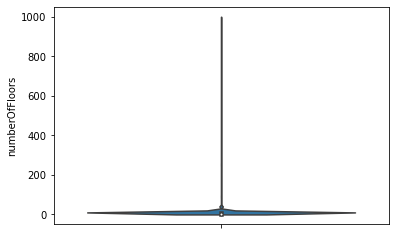

numberOfFloors


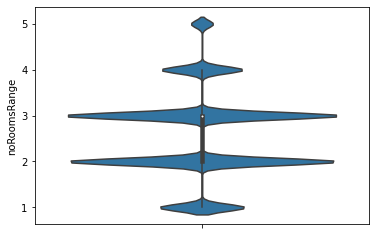

noRoomsRange


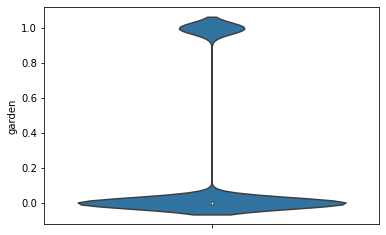

garden


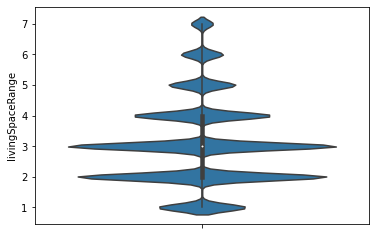

livingSpaceRange


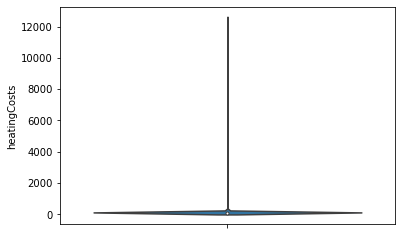

heatingCosts


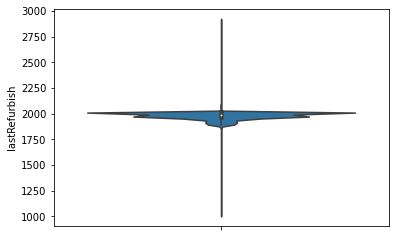

lastRefurbish


In [49]:
for i in data.columns:
    try:
        sns.violinplot(y = data[i])
        plt.show()
        print(i)
    except:
        pass

In [52]:
q1=[]
q3=[]
outliers_removal_features = ['serviceCharge','totalRent','yearConstructed','noParkSpaces','baseRent','livingSpace','noRooms','thermalChar','floor','numberOfFloors','heatingCosts','lastRefurbish']
for feat in outliers_removal_features:
    q1.append(data[feat].quantile(.05))
    q3.append(data[feat].quantile(.95))
    
iqr = data.copy()
for i in range(len(outliers_removal_features)):
    feat = outliers_removal_features[i]
    mask = iqr[feat].between(q1[i], q3[i], inclusive=True)
    before = iqr.shape[0]
    iqr = iqr.loc[mask]
    print('{} : {} -> {}'.format(feat, before, iqr.shape[0]))

serviceCharge : 268850 -> 247494
totalRent : 247494 -> 230209
yearConstructed : 230209 -> 213178
noParkSpaces : 213178 -> 206807
baseRent : 206807 -> 203218
livingSpace : 203218 -> 193393
noRooms : 193393 -> 190399
thermalChar : 190399 -> 173655
floor : 173655 -> 169881
numberOfFloors : 169881 -> 163308
heatingCosts : 163308 -> 150862
lastRefurbish : 150862 -> 142797


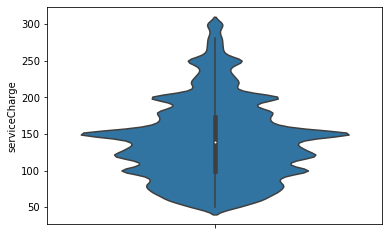

serviceCharge


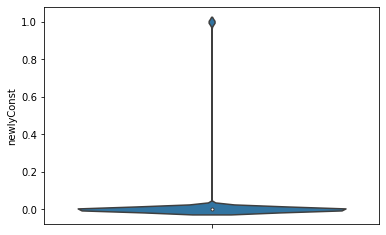

newlyConst


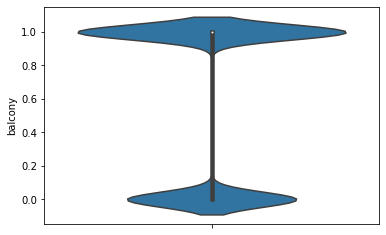

balcony


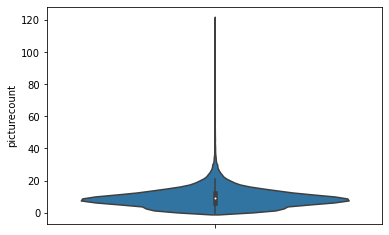

picturecount


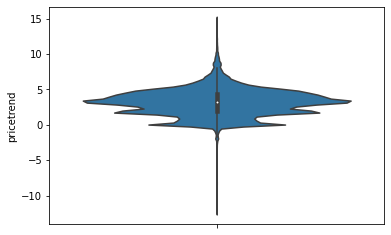

pricetrend


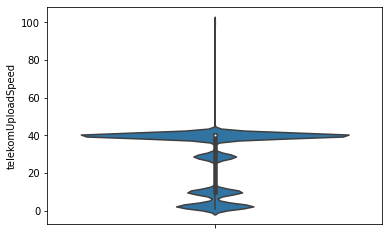

telekomUploadSpeed


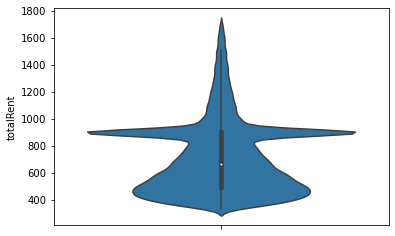

totalRent


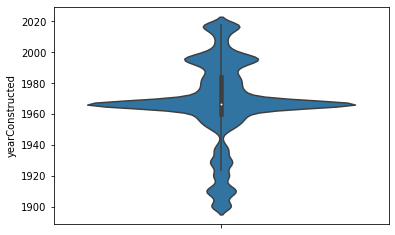

yearConstructed


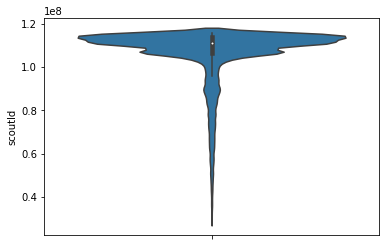

scoutId


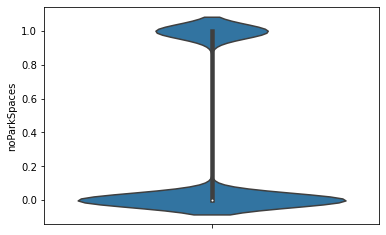

noParkSpaces


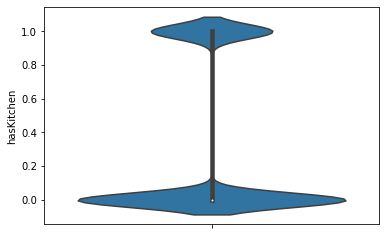

hasKitchen


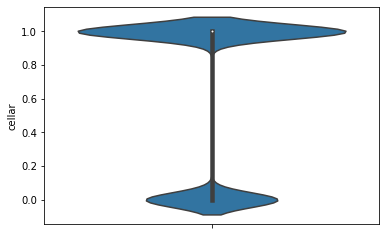

cellar


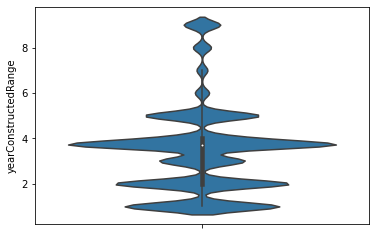

yearConstructedRange


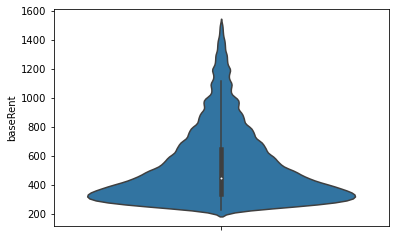

baseRent


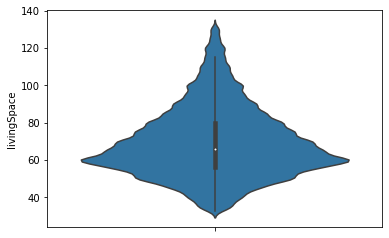

livingSpace


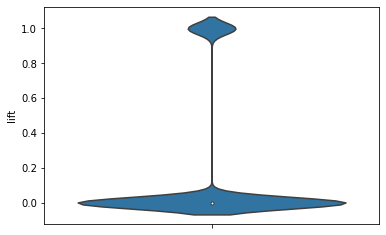

lift


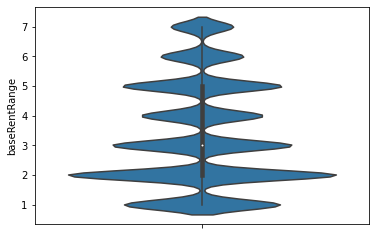

baseRentRange


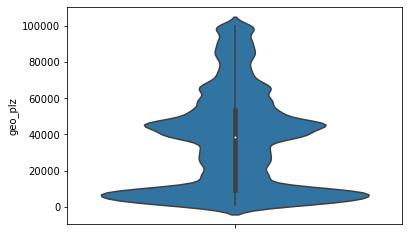

geo_plz


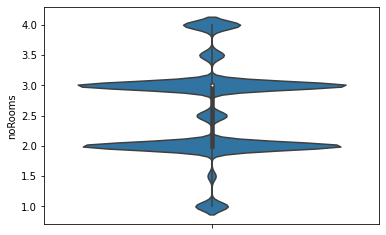

noRooms


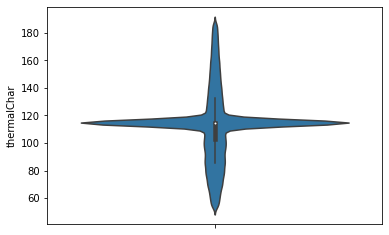

thermalChar


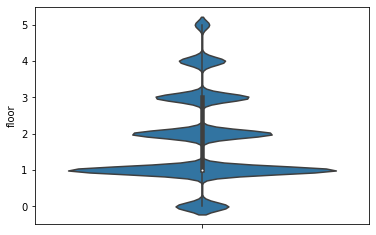

floor


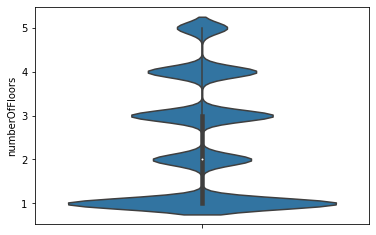

numberOfFloors


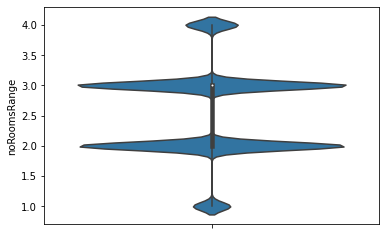

noRoomsRange


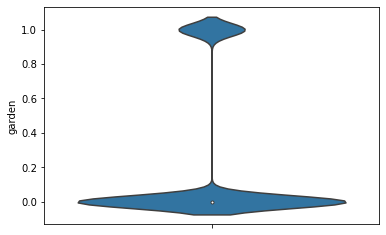

garden


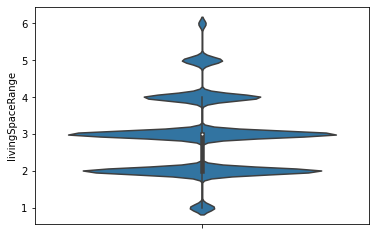

livingSpaceRange


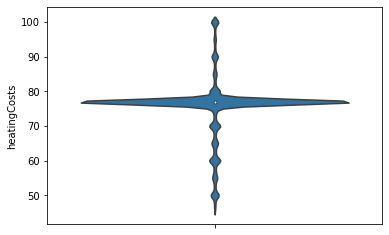

heatingCosts


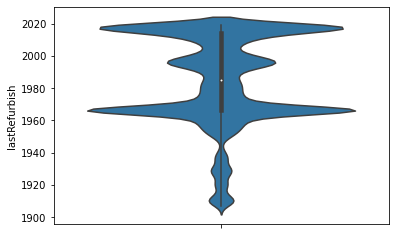

lastRefurbish


In [53]:
for i in iqr.columns:
    try:
        sns.violinplot(y = iqr[i])
        plt.show()
        print(i)
    except:
        pass

looks ok 

In [80]:
data = iqr.copy()

### Cleaning and Feature Engineering

In [81]:
data.date.unique()

array(['May19', 'Feb20', 'Oct19', 'Sep18'], dtype=object)

In [82]:
label_encoding_faetures = ['newlyConst', 'balcony', 'hasKitchen', 'cellar', 'lift', 'garden', 'date']
for feat in label_encoding_faetures:
    le = preprocessing.LabelEncoder()
    le.fit(data[feat])
    data[feat] = le.transform(data[feat])

In [83]:
one_hot_features = ['regio1', 'heatingType', 'telekomTvOffer', 'firingTypes', 'geo_bln', 'geo_krs', 'condition', 
                    'interiorQual', 'petsAllowed', 'street', 'streetPlain', 'typeOfFlat','regio2','regio3']
for feat in one_hot_features:
    print(feat,'\t\t',len(data[feat].unique()))

regio1 		 16
heatingType 		 13
telekomTvOffer 		 3
firingTypes 		 85
geo_bln 		 16
geo_krs 		 419
condition 		 10
interiorQual 		 4
petsAllowed 		 3
street 		 35339
streetPlain 		 36538
typeOfFlat 		 10
regio2 		 419
regio3 		 7516


In [84]:
drop_features = ['street', 'streetPlain', 'regio1', 'regio2', 'regio3']
data = data.drop(drop_features, axis=1)

In [85]:
# i don't know anything about German Language
data = data.drop(['description','facilities'], axis = 1)

In [86]:
one_hot_features = ['heatingType', 'telekomTvOffer', 'firingTypes', 'geo_bln', 'geo_krs', 'condition', 
                    'interiorQual', 'petsAllowed', 'typeOfFlat']
df = data.copy()
for feat in one_hot_features:
    one_hot = pd.get_dummies(df[feat])
    # Drop column B as it is now encoded
    df = df.drop(feat, axis = 1)
    # Join the encoded df
    df = df.join(one_hot,rsuffix='_r')
df.head()

,serviceCharge,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,hasKitchen,cellar,yearConstructedRange,baseRent,livingSpace,lift,baseRentRange,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,...,fully_renovated,mint_condition,modernized,need_of_renovation,negotiable,refurbished,ripe_for_demolition,well_kept,luxury,normal,simple,sophisticated,negotiable_r,no,yes,apartment,ground_floor,half_basement,loft,maisonette,other,penthouse,raised_ground_floor,roof_storey,terraced_flat
0,245.00,0,0,6,4.62,10.0,840.000000,1965.00000,96107057,1.0,0,1,2.000000,595.0,86.00,0,4,44269,4.0,181.400000,1.0,3.0,4,1,4,...,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
3,58.15,0,1,9,1.53,40.0,901.331522,1964.00000,108890903,0.0,0,0,2.000000,343.0,58.15,0,2,9599,3.0,86.000000,3.0,1.0,3,0,2,...,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
5,142.00,0,1,5,4.48,2.4,901.331522,1999.00000,115531145,0.0,1,0,5.000000,315.2,53.43,0,2,24891,2.0,165.000000,1.0,1.0,2,0,2,...,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
6,70.00,0,0,9,1.01,2.4,380.000000,1966.40059,114391930,0.0,0,1,3.714544,310.0,62.00,0,2,9599,2.0,114.749533,1.0,4.0,2,1,3,...,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
8,110.00,0,0,5,3.77,40.0,690.000000,1970.00000,106416361,1.0,1,1,2.000000,580.0,53.00,0,4,79211,2.0,138.000000,2.0,2.0,2,0,2,...,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0


In [87]:
# df.to_csv(path+'one_hot.csv', index = None)
# df = pd.read_csv(path+'one_hot.csv')

# Exploratory Data Analysis

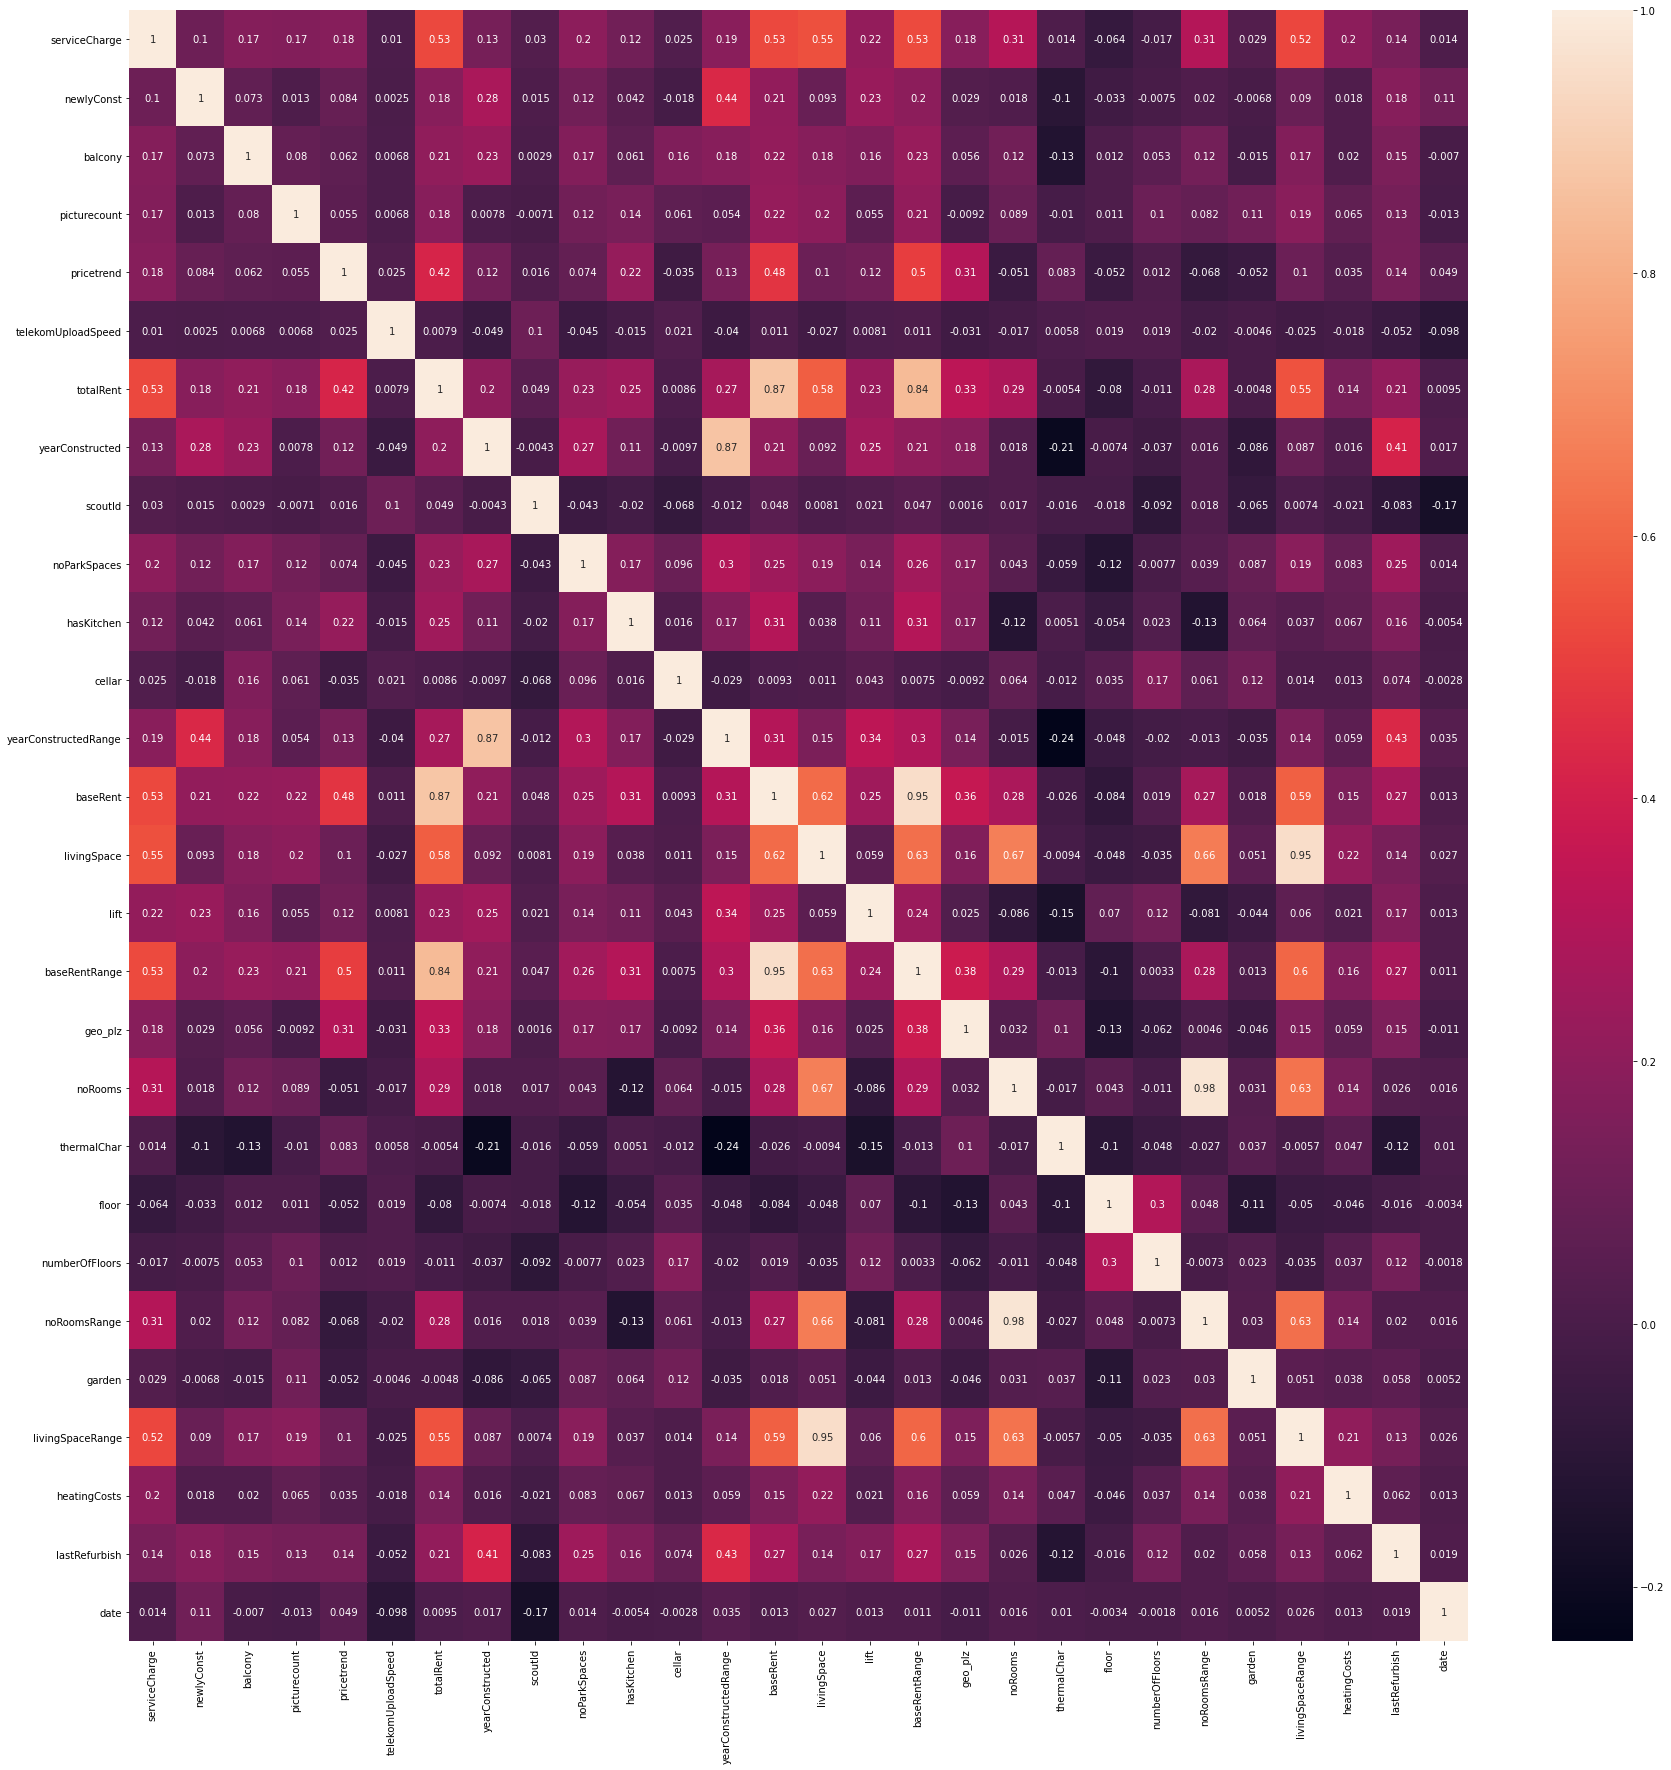

livingSpace             1.000000
livingSpaceRange        0.953983
noRooms                 0.668460
noRoomsRange            0.658352
baseRentRange           0.625771
baseRent                0.615193
totalRent               0.578967
serviceCharge           0.546050
heatingCosts            0.217411
picturecount            0.195358
noParkSpaces            0.193119
balcony                 0.179437
geo_plz                 0.163061
yearConstructedRange    0.149485
lastRefurbish           0.139621
pricetrend              0.102046
newlyConst              0.092899
yearConstructed         0.092301
lift                    0.059042
garden                  0.050801
hasKitchen              0.038414
date                    0.027402
cellar                  0.011291
scoutId                 0.008148
thermalChar            -0.009412
telekomUploadSpeed     -0.026983
numberOfFloors         -0.034676
floor                  -0.047704
Name: livingSpace, dtype: float64


In [103]:
plt.figure(figsize=(30,30))
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.savefig(path+'corr.jpg')
plt.show()
print(corrMatrix['livingSpace'].sort_values(ascending=False))

In [105]:
data.head()

,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,livingSpace,geo_krs,condition,interiorQual,petsAllowed,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,heatingCosts,lastRefurbish,date
0,245.00,central_heating,ONE_YEAR_FREE,0,0,6,4.62,10.0,840.000000,1965.00000,96107057,1.0,oil,0,Nordrhein_Westfalen,1,2.000000,595.0,86.00,Dortmund,well_kept,normal,negotiable,0,4,ground_floor,44269,4.0,181.400000,1.0,3.0,4,1,4,76.990866,1965.00000,1
3,58.15,district_heating,ONE_YEAR_FREE,0,1,9,1.53,40.0,901.331522,1964.00000,108890903,0.0,district_heating,0,Sachsen,0,2.000000,343.0,58.15,Mittelsachsen_Kreis,well_kept,normal,negotiable,0,2,other,9599,3.0,86.000000,3.0,1.0,3,0,2,87.230000,1964.00000,1
5,142.00,gas_heating,NONE,0,1,5,4.48,2.4,901.331522,1999.00000,115531145,0.0,gas,1,Schleswig_Holstein,0,5.000000,315.2,53.43,Schleswig_Flensburg_Kreis,well_kept,normal,no,0,2,apartment,24891,2.0,165.000000,1.0,1.0,2,0,2,76.990866,1999.00000,0
6,70.00,self_contained_central_heating,ONE_YEAR_FREE,0,0,9,1.01,2.4,380.000000,1966.40059,114391930,0.0,gas,0,Sachsen,1,3.714544,310.0,62.00,Mittelsachsen_Kreis,fully_renovated,normal,negotiable,0,2,maisonette,9599,2.0,114.749533,1.0,4.0,2,1,3,76.990866,1966.40059,0
8,110.00,oil_heating,ONE_YEAR_FREE,0,0,5,3.77,40.0,690.000000,1970.00000,106416361,1.0,oil,1,Baden_Württemberg,1,2.000000,580.0,53.00,Emmendingen_Kreis,well_kept,sophisticated,no,0,4,roof_storey,79211,2.0,138.000000,2.0,2.0,2,0,2,76.990866,1970.00000,0


### Hypothesis 1: telekomTvOffer VS livingSpace

['ONE_YEAR_FREE' 'NONE' 'ON_DEMAND']


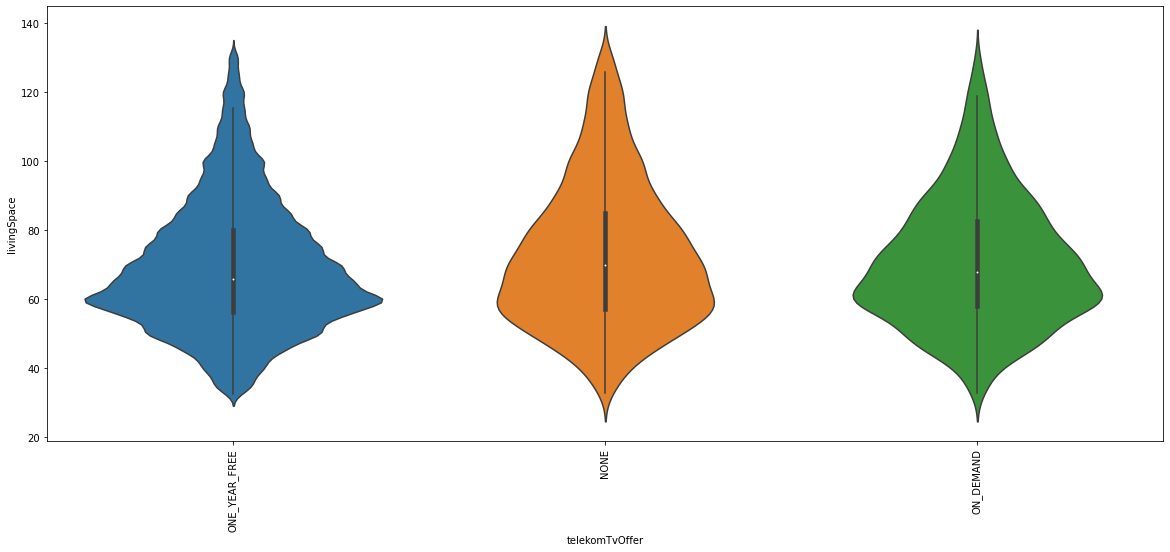

In [126]:
feat = 'telekomTvOffer'
plt.figure(figsize=(20, 8))
plt.xticks(rotation=90)
sns.violinplot(x=feat, y='livingSpace', data=data)
plt.savefig(path+feat+'.jpg', bbox_inches = 'tight')
print(data[feat].unique())

In [127]:
a1 = data[data[feat] == 'ONE_YEAR_FREE'].livingSpace.values
a2 = data[data[feat] == 'NONE'].livingSpace.values
a3 = data[data[feat] == 'ON_DEMAND'].livingSpace.values
stats.f_oneway(a1,a2,a3)

F_onewayResult(statistic=73.82257276025561, pvalue=9.032907481686397e-33)

because p-value is too small alternative hypothesis is true. it means that livingSpace mean in **telekomTvOffer** are diffrent

### Hypothesis 2: interiorQual VS livingSpace

['normal' 'sophisticated' 'simple' 'luxury']


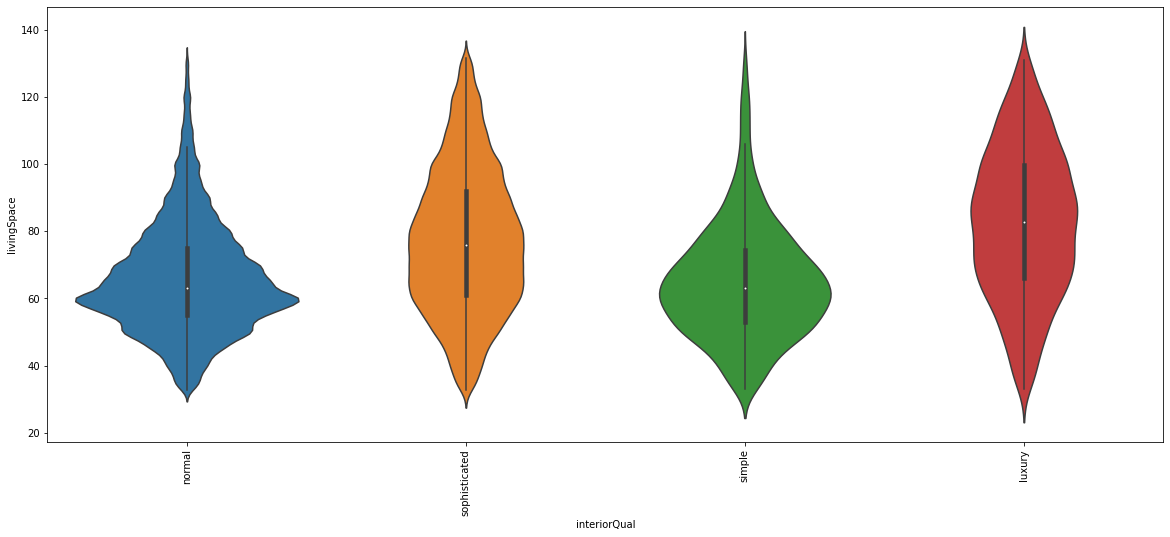

In [128]:
feat = 'interiorQual'
plt.figure(figsize=(20, 8))
plt.xticks(rotation=90)
sns.violinplot(x=feat, y='livingSpace', data=data)
plt.savefig(path+feat+'.jpg', bbox_inches = 'tight')
print(data[feat].unique())

In [129]:
a1 = data[data[feat] == 'normal'].livingSpace.values
a2 = data[data[feat] == 'sophisticated'].livingSpace.values
a3 = data[data[feat] == 'simple'].livingSpace.values
a4 = data[data[feat] == 'luxury'].livingSpace.values
stats.f_oneway(a1,a2,a3,a4)

F_onewayResult(statistic=4225.957452550397, pvalue=0.0)

because p-value is too small alternative hypothesis is true. it means that livingSpace mean in **interiorQual** are diffrent

### Hypothesis 3 petsAllowed VS livingSpace

['negotiable' 'no' 'yes']


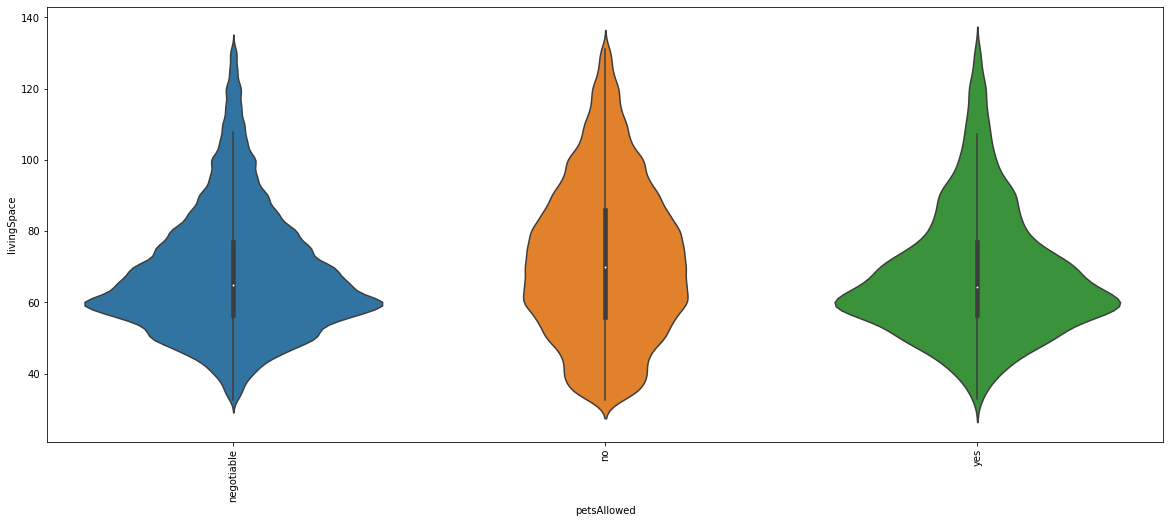

In [130]:
feat = 'petsAllowed'
plt.figure(figsize=(20, 8))
plt.xticks(rotation=90)
sns.violinplot(x=feat, y='livingSpace', data=data)
plt.savefig(path+feat+'.jpg', bbox_inches = 'tight')
print(data[feat].unique())

In [131]:
a1 = data[data[feat] == 'negotiable'].livingSpace.values
a2 = data[data[feat] == 'no'].livingSpace.values
a3 = data[data[feat] == 'yes'].livingSpace.values
stats.f_oneway(a1,a2,a3)

F_onewayResult(statistic=723.4140244826011, pvalue=2.5483730514e-313)

because p-value is too small alternative hypothesis is true. it means that livingSpace mean in **petsAllowed** are diffrent

### Hypothesis 4: typeOfFlat VS livingSpace

['ground_floor' 'other' 'apartment' 'maisonette' 'roof_storey'
 'raised_ground_floor' 'half_basement' 'terraced_flat' 'loft' 'penthouse']


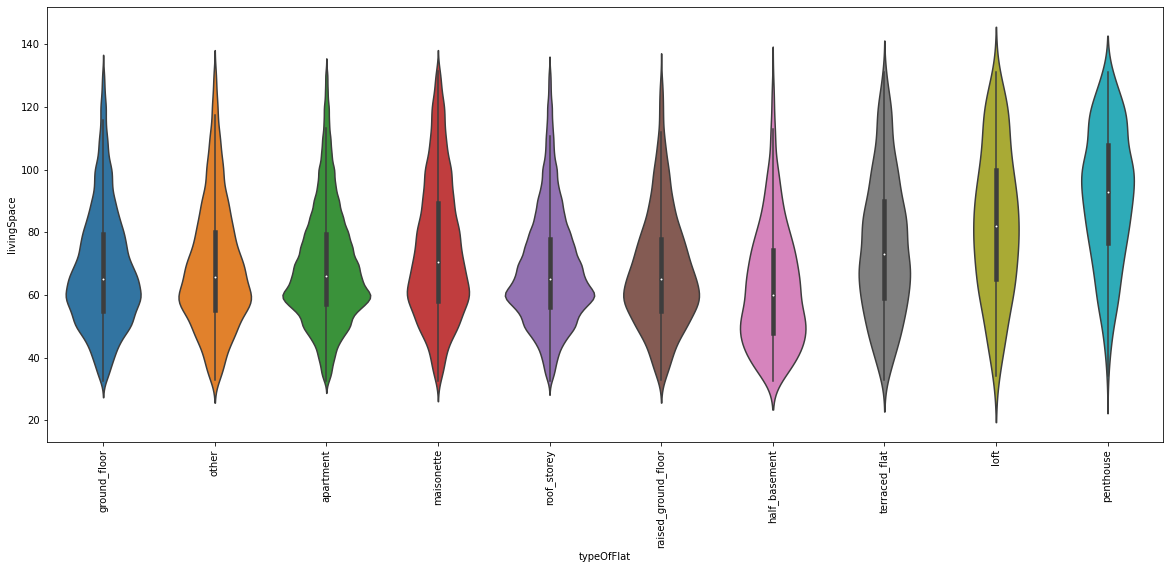

In [133]:
feat = 'typeOfFlat'
plt.figure(figsize=(20, 8))
plt.xticks(rotation=90)
sns.violinplot(x=feat, y='livingSpace', data=data)
plt.savefig(path+feat+'.jpg', bbox_inches = 'tight')
print(data[feat].unique())

In [134]:
a1 = data[data[feat] == 'ground_floor'].livingSpace.values
a2 = data[data[feat] == 'other'].livingSpace.values
a3 = data[data[feat] == 'apartment'].livingSpace.values
a4 = data[data[feat] == 'maisonette'].livingSpace.values
a5 = data[data[feat] == 'roof_storey'].livingSpace.values
a6 = data[data[feat] == 'raised_ground_floor'].livingSpace.values
a7 = data[data[feat] == 'half_basement'].livingSpace.values
a8 = data[data[feat] == 'terraced_flat'].livingSpace.values
a9 = data[data[feat] == 'loft'].livingSpace.values
a10 = data[data[feat] == 'penthouse'].livingSpace.values
stats.f_oneway(a1,a2,a3,a4,a5,a6,a7,a8,a9,a10)

F_onewayResult(statistic=279.2374096482586, pvalue=0.0)

because p-value is too small alternative hypothesis is true. it means that livingSpace mean in **typeOfFlat** are diffrent

### Hypothesis 5: regio1/geo_bln VS livingSpace

['Nordrhein_Westfalen' 'Sachsen' 'Schleswig_Holstein' 'Baden_Württemberg'
 'Rheinland_Pfalz' 'Hessen' 'Hamburg' 'Mecklenburg_Vorpommern' 'Bayern'
 'Niedersachsen' 'Sachsen_Anhalt' 'Bremen' 'Berlin' 'Thüringen'
 'Brandenburg' 'Saarland']


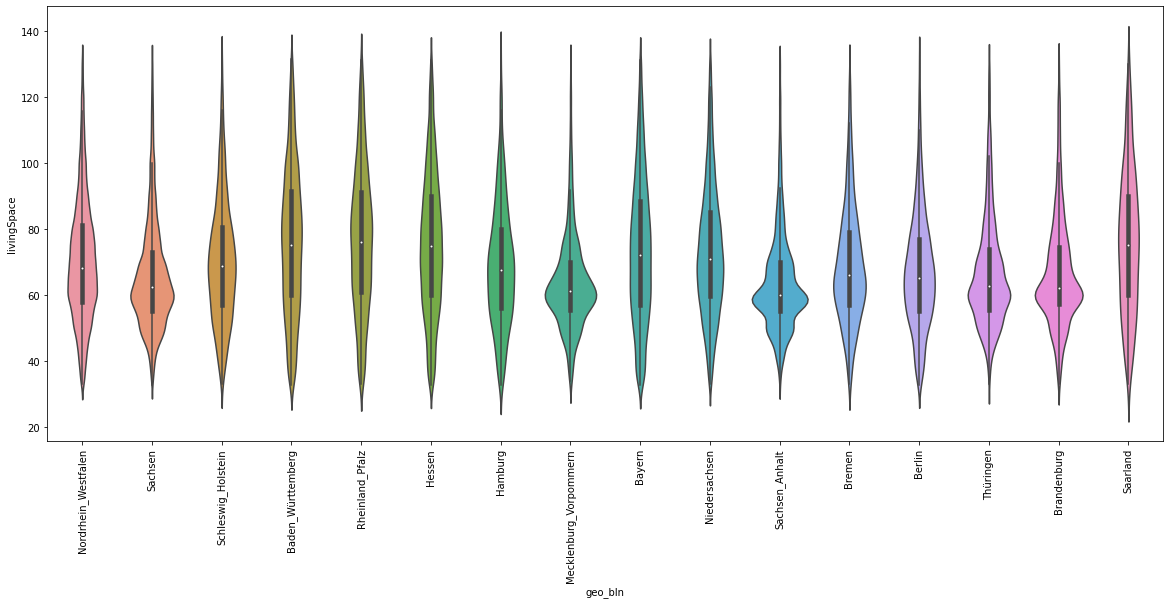

In [138]:
feat = 'geo_bln'
plt.figure(figsize=(20, 8))
plt.xticks(rotation=90)
sns.violinplot(x=feat, y='livingSpace', data=data)
plt.savefig(path+feat+'.jpg', bbox_inches = 'tight')
print(data[feat].unique())

In [139]:
a1 = data[data[feat] == 'Nordrhein_Westfalen'].livingSpace.values
a2 = data[data[feat] == 'Sachsen'].livingSpace.values
a3 = data[data[feat] == 'Schleswig_Holstein'].livingSpace.values
a4 = data[data[feat] == 'Baden_Württemberg'].livingSpace.values
a5 = data[data[feat] == 'Rheinland_Pfalz'].livingSpace.values
a6 = data[data[feat] == 'Hessen'].livingSpace.values
a7 = data[data[feat] == 'Hamburg'].livingSpace.values
a8 = data[data[feat] == 'Mecklenburg_Vorpommern'].livingSpace.values
a9 = data[data[feat] == 'Bayern'].livingSpace.values
a10 = data[data[feat] == 'Niedersachsen'].livingSpace.values
a11 = data[data[feat] == 'Sachsen_Anhalt'].livingSpace.values
a12 = data[data[feat] == 'Bremen'].livingSpace.values
a13 = data[data[feat] == 'Berlin'].livingSpace.values
a14 = data[data[feat] == 'Thüringen'].livingSpace.values
a15 = data[data[feat] == 'Brandenburg'].livingSpace.values
a16 = data[data[feat] == 'Saarland'].livingSpace.values
stats.f_oneway(a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16)

F_onewayResult(statistic=462.18284356789746, pvalue=0.0)

because p-value is too small alternative hypothesis is true. it means that livingSpace mean in **geo_bln** are diffrent

In [142]:
stats.f_oneway(a13,a14,a15)

F_onewayResult(statistic=1.4698083246647065, pvalue=0.23001007721429811)

because p-value is significant hypothesis is true. it means that livingSpace mean in three of **geo_bln** are the same

# Modeling

In [234]:
def reg_report(true, pred, name='Test'):
    print("\n{} Results :\n".format(name))
    print("RSS :",sum((pred-true)**2))
    print("RSE :",math.sqrt(sum((pred-true)**2)*(1/(len(pred)-2))))
    print("TSS :",sum((true-true.mean())**2))
    print("R Squared :",1-(sum((pred-true)**2)/sum((true-true.mean())**2)))
    print("MSE :",((pred-true)**2).mean())
    print('MAE :',(abs(pred-true)).mean())
    print('Accuracy with 10% :', ((pred<=true*1.1) & (true*0.9<=pred)).mean())
    

def eval_report(y_train, pred_train,y_test, pred_test):
    reg_report(y_train, pred_train, name='Train')
    reg_report(y_test, pred_test, name='Test')

    

In [3]:
data = pd.read_csv(path+'one_hot.csv')
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Berlin_r', 'Hamburg_r',  'livingSpace'], axis=1), data['livingSpace'], test_size=0.30, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(99957, 588)
(99957,)
(42840, 588)
(42840,)


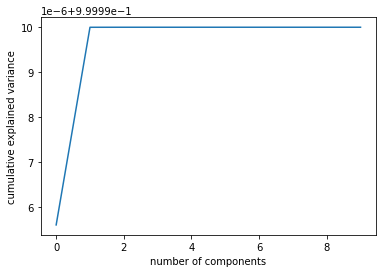

In [4]:
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_)[:10])
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [5]:
#apply pca with 10 features 
scaler = PCA(n_components=10)
scaler.fit(X_train)

pca_X_train = pd.DataFrame(scaler.transform(X_train))
pca_X_test = pd.DataFrame(scaler.transform(X_test))

display(pca_X_train.head())
display(pca_X_test.head())

,0,1,2,3,4,5,6,7,8,9
0,5.460857e+07,-31842.554089,-163.697962,27.226188,39.792592,0.288760,-4.669531,-19.397411,-11.988830,9.160285
1,-8.992682e+06,-4320.007385,-341.162356,85.026105,62.504843,-18.935369,23.681174,27.201968,10.888376,-4.011317
2,-6.786521e+06,-32022.402364,260.237292,-134.014728,-17.676261,64.954907,-12.538046,-3.623191,-30.433156,-0.683696
3,-8.017966e+05,28833.796289,207.187911,25.239738,3.117326,-21.762766,-6.997939,-11.099017,-17.905563,-0.459707
4,1.688485e+07,46161.379795,440.158332,23.162598,11.430919,-14.497852,4.269067,-1.101075,14.387542,0.643333


,0,1,2,3,4,5,6,7,8,9
0,-7.357783e+06,45371.340345,830.909025,-60.734479,-23.610277,0.699075,13.610344,17.965268,10.393305,2.678772
1,1.311897e+07,-6208.139810,-286.241787,76.867577,54.003893,8.677564,-5.800929,-13.829497,-24.918758,-3.346682
2,-4.656633e+06,-34917.732956,-71.544337,47.992200,3.107831,-29.440078,25.058089,15.115216,-0.131703,-1.741243
3,-9.144069e+06,9528.196997,-337.132576,-2.519540,-53.726905,34.952088,34.039637,-24.603917,9.953397,-0.413177
4,-9.061646e+06,-33677.088084,136.908940,0.540045,-60.290270,-33.575705,51.796708,-18.092976,0.048332,0.652976


In [6]:
corrMatrix = data.corr()

In [7]:
a = corrMatrix['livingSpace'].sort_values(ascending=False)
features = a[(a>0.5) & (a<1)].index
features

Index(['livingSpaceRange', 'noRooms', 'noRoomsRange', 'baseRentRange',
       'baseRent', 'totalRent', 'serviceCharge'],
      dtype='object')

# From Scratch Regression

In [236]:
# Ordinary least squares
class My_LinearRegressin():
    def __init__(self):
        self.coefficients = None
        self.intercept = None

    def fit(self, x, y):
        x = np.c_[np.ones(len(x)),x]
        y = y.values
    
        xT = x.transpose()
        inversed = np.linalg.inv( xT.dot(x) )
        betas = inversed.dot( xT ).dot(y)
        
        self.intercept = betas[0]
        self.coefficients = betas[1:]

    def predict(self, x):
        return np.multiply(x, self.coefficients).sum(axis = 1) + self.intercept


In [239]:
class My_LinearRegressin_epsilon_sensitive():
    def __init__(self, epsilon=0):
        a = None
        b = None
        self.epsilon = epsilon
    
    def predict(self, X):
        return X.dot(self.a)+self.b
    
    def fit(self, X, Y, alpha = 0.01, iterations = 500):
        
        self.a = np.zeros(X.shape[1])
        self.b = 1
        
        n = len(X)
        print(self.epsilon)
        for iteration in range(iterations):
                h = self.predict(X)
                
                if (Y - h).mean() > self.epsilon:
                    a_gradient = -(1/n)#*X.sum(axis = 0)
                    b_gradient = -1/n
                elif (h - Y).mean() > self.epsilon:
                    a_gradient = (1/n)#*X.sum(axis = 0)
                    b_gradient = 1/n
                else:
                    a_gradient = 0
                    b_gradient = 0
#                 print(self.a[0])
                self.a = self.a - alpha * a_gradient
#                 print(self.a[0])
#                 print((h - Y).mean(), a_gradient)
                self.b = self.b - alpha * b_gradient

            

### all features

In [237]:
%%time
temp_X_train = X_train+0.01*np.random.rand(X_train.shape[0], X_train.shape[1])
temp_X_test = X_test+0.01*np.random.rand(X_test.shape[0], X_test.shape[1])

reg = My_LinearRegressin()

reg.fit(temp_X_train, y_train)
test_pred = reg.predict(temp_X_test)
train_pred = reg.predict(temp_X_train)
eval_report(y_train, train_pred.values, y_test, test_pred.values)


Train Results :

RSS : 2387312.8445123117
RSE : 4.887113277734449
TSS : 34825899.83965545
R Squared : 0.9314500743554677
MSE : 23.883398306394866
MAE : 4.031086664223248
Accuracy with 10% : 0.8233840551437118

Test Results :

RSS : 1046919.860219171
RSE : 4.943586368121222
TSS : 15150707.029779678
R Squared : 0.93089960368441
MSE : 24.437905233874208
MAE : 4.075864216247644
Accuracy with 10% : 0.8208683473389355
Wall time: 5.85 s


### correlation features

In [240]:
%%time
reg = My_LinearRegressin()
reg.fit(X_train[features], y_train)
test_pred = reg.predict(X_test[features])
train_pred = reg.predict(X_train[features])
eval_report(y_train, train_pred, y_test, test_pred)


Train Results :

RSS : 2643736.1294874703
RSE : 5.142884741410529
TSS : 34825899.83965545
R Squared : 0.9240870690589562
MSE : 26.448734250602463
MAE : 4.284348172239554
Accuracy with 10% : 0.7925808097481917

Test Results :

RSS : 1138375.2223032278
RSE : 5.15499352295885
TSS : 15150707.029779678
R Squared : 0.9248632278305112
MSE : 26.57271760745163
MAE : 4.297263191585611
Accuracy with 10% : 0.7949579831932773
Wall time: 403 ms


### PCA features

In [241]:
%%time
reg = My_LinearRegressin()
reg.fit(pca_X_train, y_train)
test_pred = reg.predict(pca_X_test)
train_pred = reg.predict(pca_X_train)
eval_report(y_train, train_pred.values, y_test, test_pred.values)


Train Results :

RSS : 18724882.42466397
RSE : 13.686969136828953
TSS : 34825899.83965545
R Squared : 0.4623288267962462
MSE : 187.32937587826734
MAE : 10.36111123022453
Accuracy with 10% : 0.4321458227037626

Test Results :

RSS : 8066416.367260786
RSE : 13.722262548672798
TSS : 15150707.029779678
R Squared : 0.4675881230225275
MSE : 188.29169858218455
MAE : 10.363198118516221
Accuracy with 10% : 0.43564425770308124
Wall time: 330 ms


### different errors

In [244]:
%%time
# with epsilon = 0 it is MAE
reg = My_LinearRegressin_epsilon_sensitive(epsilon=0)

reg.fit(X_train, y_train)
test_pred = reg.predict(X_test)
train_pred = reg.predict(X_train)
eval_report(y_train, train_pred, y_test, test_pred)

0

Train Results :

RSS : 42455919.16363589
RSE : 20.60947183419645
TSS : 34825899.83965545
R Squared : -0.21909037122114228
MSE : 424.741830623527
MAE : 15.818002325054112
Accuracy with 10% : 0.2727272727272727

Test Results :

RSS : 18633557.91383313
RSE : 20.85610960494824
TSS : 15150707.029779678
R Squared : -0.22988041925750968
MSE : 434.9570007897556
MAE : 15.942821681934737
Accuracy with 10% : 0.2740429505135388
Wall time: 1min 48s


In [245]:
%%time
# epsilon-sensitive 
reg = My_LinearRegressin_epsilon_sensitive(epsilon=0.5)

reg.fit(X_train, y_train)
test_pred = reg.predict(X_test)
train_pred = reg.predict(X_train)
eval_report(y_train, train_pred, y_test, test_pred)

0.5

Train Results :

RSS : 42455919.16363589
RSE : 20.60947183419645
TSS : 34825899.83965545
R Squared : -0.21909037122114228
MSE : 424.741830623527
MAE : 15.818002325054112
Accuracy with 10% : 0.2727272727272727

Test Results :

RSS : 18633557.91383313
RSE : 20.85610960494824
TSS : 15150707.029779678
R Squared : -0.22988041925750968
MSE : 434.9570007897556
MAE : 15.942821681934737
Accuracy with 10% : 0.2740429505135388
Wall time: 1min 54s


# From Pakage Regression

### all features

In [246]:
%%time
reg = LinearRegression()
reg.fit(X_train, y_train)
test_pred = reg.predict(X_test)
train_pred = reg.predict(X_train)
eval_report(y_train, train_pred, y_test, test_pred)


Train Results :

RSS : 2386738.5733510484
RSE : 4.8865254417031405
TSS : 34825899.83965545
R Squared : 0.931466564127847
MSE : 23.877653124353955
MAE : 4.0304516566303
Accuracy with 10% : 0.823033904578969

Test Results :

RSS : 318371583.40690887
RSE : 86.20898968002473
TSS : 15150707.029779678
R Squared : -20.013645289366977
MSE : 7431.642936669208
MAE : 5.216098272868516
Accuracy with 10% : 0.8212885154061624
Wall time: 3.36 s


In [247]:
%%time
reg = make_pipeline(StandardScaler(),
                    LinearRegression())

reg.fit(X_train, y_train)
test_pred = reg.predict(X_test)
train_pred = reg.predict(X_train)
eval_report(y_train, train_pred, y_test, test_pred)


Train Results :

RSS : 2387006.317618762
RSE : 4.886799519161886
TSS : 34825899.83965545
R Squared : 0.9314588760488901
MSE : 23.880331718826717
MAE : 4.0306798740651475
Accuracy with 10% : 0.8228938443530718

Test Results :

RSS : 4.002497060336518e+25
RSE : 30566866314.575523
TSS : 15150707.029779678
R Squared : -2.6417889623694495e+18
MSE : 9.34289696623837e+20
MAE : 344613289.5534751
Accuracy with 10% : 0.8212885154061624
Wall time: 5.51 s


### correlation features

In [249]:
%%time
reg = LinearRegression()
reg.fit(X_train[features], y_train)
test_pred = reg.predict(X_test[features])
train_pred = reg.predict(X_train[features])
eval_report(y_train, train_pred, y_test, test_pred)


Train Results :

RSS : 2643736.129487478
RSE : 5.142884741410537
TSS : 34825899.83965545
R Squared : 0.924087069058956
MSE : 26.44873425060254
MAE : 4.284348172239523
Accuracy with 10% : 0.7925808097481917

Test Results :

RSS : 1138375.2223032292
RSE : 5.154993522958853
TSS : 15150707.029779678
R Squared : 0.9248632278305111
MSE : 26.57271760745166
MAE : 4.297263191585543
Accuracy with 10% : 0.7949579831932773
Wall time: 200 ms


### PCA features

In [250]:
%%time
reg = LinearRegression()
reg.fit(pca_X_train, y_train)
test_pred = reg.predict(pca_X_test)
train_pred = reg.predict(pca_X_train)
eval_report(y_train, train_pred, y_test, test_pred)


Train Results :

RSS : 18724882.42466394
RSE : 13.686969136828942
TSS : 34825899.83965545
R Squared : 0.4623288267962471
MSE : 187.32937587826703
MAE : 10.361111230226319
Accuracy with 10% : 0.4321458227037626

Test Results :

RSS : 8066416.367258208
RSE : 13.722262548670606
TSS : 15150707.029779678
R Squared : 0.4675881230226977
MSE : 188.29169858212435
MAE : 10.363198118518707
Accuracy with 10% : 0.43564425770308124
Wall time: 177 ms


### different errors

In [251]:
%%time
# with epsilon = 0 it is MAE
reg = make_pipeline(StandardScaler(),
                    SGDRegressor(max_iter=1000, tol=1e-3,
                                 loss = 'epsilon_insensitive',
                                 epsilon=0))

reg.fit(X_train, y_train)
test_pred = reg.predict(X_test)
train_pred = reg.predict(X_train)
eval_report(y_train, train_pred, y_test, test_pred)


Train Results :

RSS : 2481269.1627922184
RSE : 4.982355102357406
TSS : 34825899.83965545
R Squared : 0.9287521880492272
MSE : 24.823365675162503
MAE : 3.9993189289854576
Accuracy with 10% : 0.8247346358934342

Test Results :

RSS : 1088149.7007616186
RSE : 5.039990643871551
TSS : 15150707.029779678
R Squared : 0.9281782890644779
MSE : 25.40031981236271
MAE : 4.05408781756378
Accuracy with 10% : 0.8225490196078431
Wall time: 8.05 s


In [252]:
%%time
# epsilon-sensitive 
reg = make_pipeline(StandardScaler(),
                    SGDRegressor(max_iter=1000, tol=1e-3,
                                 loss = 'epsilon_insensitive',
                                 epsilon=0.5))

reg.fit(X_train, y_train)
test_pred = reg.predict(X_test)
train_pred = reg.predict(X_train)
eval_report(y_train, train_pred, y_test, test_pred)


Train Results :

RSS : 2478365.987529153
RSE : 4.979439480823716
TSS : 34825899.83965545
R Squared : 0.9288355505833307
MSE : 24.79432143350794
MAE : 3.9991651963810457
Accuracy with 10% : 0.8237041928029053

Test Results :

RSS : 1083537.3114615555
RSE : 5.0292976826276234
TSS : 15150707.029779678
R Squared : 0.9284827229955808
MSE : 25.292654329167963
MAE : 4.050565275455026
Accuracy with 10% : 0.8224556489262371
Wall time: 7.15 s
